In [1]:
!pip install justext

In [0]:
import numpy as np
import nltk
import justext
import re
from nltk.tokenize import sent_tokenize
import collections

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

1.1.1

In [0]:
def top_txt(txt,top):
  most_common_words = [word for (word,f) in collections.Counter(txt).most_common(top)]
  return ''.join([word if word in most_common_words or word=='N' else '<unk>' for word in txt])
def replace_numbers(txt):
  #TODO:: Check replace numbers RegEx.
  num_format = re.compile("^[\-]?[1-9][0-9]*\.?[0-9]+$")
  return "".join([word if not re.match(num_format,word) else 'N' for word in txt])
def remove_punc(txt):
  without_punc = "".join([ c if c not in '.,:;?!@#*&%$<>' else '' for c in txt])
  return without_punc.replace("  "," ")
def tokenize(txt):
  return " ".join(nltk.word_tokenize(txt))
def segment_sents(txt):
  return "\n".join(nltk.sent_tokenize(txt))
def lower_txt(txt):
  return txt.lower()

In [0]:
def ptb_preprocess(filenames, top=10000):
  for filename in filenames:
    with open(filename) as myfile:
      

      txt_file =  myfile.read().replace('\n',' ')
      paragraphs = justext.justext(txt_file, justext.get_stoplist("English"))
      raw_text = "\n".join([p.text for p in paragraphs if not p.is_boilerplate])


      # raw_text = lower_txt(raw_text)
      # raw_text = segment_sents(raw_text)
      # print('segment_sents')
      # print(raw_text[:200])
      # raw_text = remove_punc(raw_text)
      # print('remove_punkt')
      # print(raw_text[:200])
      # raw_text = tokenize(raw_text)
      # print('tokenize')
      # print(raw_text[:200])
      # raw_text = replace_numbers(raw_text)
      # print('replace_numbers')
      # print(raw_text[:200])
      # raw_text = top_txt(raw_text,top)
      # print('top_txt')
      # print(raw_text[:200])

      raw_text = top_txt(raw_text,top)
      raw_text = replace_numbers(raw_text)
      raw_text = tokenize(raw_text)
      raw_text = segment_sents(raw_text)
      raw_text = remove_punc(raw_text)
      raw_text = lower_txt(raw_text)
      
      
      new_filename = filename+'.out'
      #print(new_filename)
      with open(new_filename, "w") as text_file:
        text_file.write(raw_text)



In [6]:
!wget https://cs.stanford.edu/people/karpathy/char-rnn/shakespeare_input.txt 

--2019-12-26 18:56:40--  https://cs.stanford.edu/people/karpathy/char-rnn/shakespeare_input.txt
Resolving cs.stanford.edu (cs.stanford.edu)... 171.64.64.64
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4573338 (4.4M) [text/plain]
Saving to: ‘shakespeare_input.txt.6’

shakespeare_input.t 100%[===================>]   4.36M  3.78MB/s    in 1.2s    

2019-12-26 18:56:42 (3.78 MB/s) - ‘shakespeare_input.txt.6’ saved [4573338/4573338]



1.1.1 Discussion: According to the descripted above if we apply the conventions of Penn Treebank, we shall give independent meaning for every word after the tokenization. Also, if we use character-level language model, we shall get another definition - morphological, because now we care about structure of the word.

1.1.2 :

In [7]:
!wget http://www.fit.vutbr.cz/~imikolov/rnnlm/simple-examples.tgz
!tar zxvf simple-examples.tgz

!ls simple-examples/data
!mv ./simple-examples/data ../data

--2019-12-26 18:56:44--  http://www.fit.vutbr.cz/~imikolov/rnnlm/simple-examples.tgz
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34869662 (33M) [application/x-gtar]
Saving to: ‘simple-examples.tgz.6’

simple-examples.tgz 100%[===================>]  33.25M  21.1MB/s    in 1.6s    

2019-12-26 18:56:45 (21.1 MB/s) - ‘simple-examples.tgz.6’ saved [34869662/34869662]

./
./simple-examples/
./simple-examples/data/
./simple-examples/data/ptb.test.txt
./simple-examples/data/ptb.train.txt
./simple-examples/data/ptb.valid.txt
./simple-examples/data/README
./simple-examples/data/ptb.char.train.txt
./simple-examples/data/ptb.char.test.txt
./simple-examples/data/ptb.char.valid.txt
./simple-examples/models/
./simple-examples/models/swb.ngram.model
./simple-examples/models/swb.rnn.model
./simple-examples/models/README
.

In [8]:
!ls

lg32965.zip		 shakespeare_input.txt.3  simple-examples.tgz.1
recipes_dataset		 shakespeare_input.txt.4  simple-examples.tgz.2
sample_data		 shakespeare_input.txt.5  simple-examples.tgz.3
shakespeare_input.txt	 shakespeare_input.txt.6  simple-examples.tgz.4
shakespeare_input.txt.1  simple-examples	  simple-examples.tgz.5
shakespeare_input.txt.2  simple-examples.tgz	  simple-examples.tgz.6


In [9]:
len(set(remove_punc('hello, you, hello').split()))

2

In [0]:
def num_token(txt):
  txt = txt.lower()
  return len(nltk.word_tokenize(txt))
def num_char(txt):
  return len(''.join(txt.split()))
def dist_words(txt): #vocabulary size
  txt = txt.lower()
  return len(set(remove_punc(txt).split()))
def topN_words(txt,N):
  most_common_words = ' '.join([word for (word,f) in collections.Counter(txt).most_common(N)])
  return num_tokenize(most_common_words)
def token_type_ratio(txt):
  return num_token(txt)/dist_words(txt)

def types_oov(txt_dev,txt_train): #Out Of Vocabulary 
    txt_dev = txt_dev.lower()
    text_dev_set = set(remove_punc(txt_dev).split())
    txt_train = txt_train.lower()
    text_train_set = set(remove_punc(txt_train).split())
    return len(tex_dev_set.difference(text_train_set))
def avg_sd_char_token(txt):
  total_chars = sum( [len(w) for w in nltk.word_tokenize(txt)])
  avg =  total_chars/num_token(txt)

  total_avg_chars = sum( [len(w)-avg for w in nltk.word_tokenize(txt)])
  sd =  total_chars/num_token(txt)
  return avg,sd

def dist_n_gram_words(txt,n=[2,3,4]):
  txt = txt.lower()
  txt = nltk.word_tokenize(txt)
  ans = {}
  for i in n:
    ans[i] = diff_grams(txt,i)
  return ans

def dist_n_gram_chars(txt,n=range(1,8)):
  ans = {}
  for i in n:
    ans[i] = diff_grams(txt,i)
  return ans

def diff_grams(txt,n):
  s = set()
  gram = list(range(0,n))
  while gram[-1]!=len(txt):
    next_gram = tuple([txt[g] for g in gram])
    s.add(next_gram)
    gram = [g+1 for g in gram]
  return len(s)

In [11]:
# you need matplotlib version 1.4 or above
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)
%matplotlib inline
def power_law_rule(corpus):
  corpus = lower_txt(corpus)
  corpus = tokenize(corpus)
  plt.loglog([val for word,val in collections.Counter(corpus).most_common(4000)])
  plt.xlabel('rank')
  plt.ylabel('frequency');

3.1.2


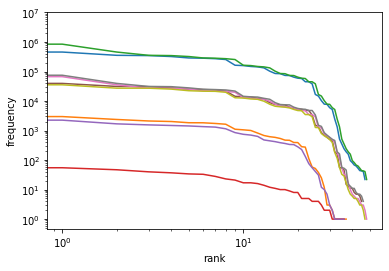

In [12]:
import os

dir = '../data'
for filename in os.listdir(dir):
  if os.path.isdir(dir+'/'+ filename):
    continue
  with open(dir+'/'+ filename,'r') as file:
      data = file.read()
      power_law_rule(data)

1.2 n-gram Word Language Model

In [0]:
#how to calculate the freq of h*w
#how to calculate the freq of w.

from collections import Counter,defaultdict
import math
from functools import reduce
from abc import ABC, abstractmethod

class LangModell:
  @abstractmethod
  def predict_next_word(self,prev_words):
    pass
  @abstractmethod
  def evaluate_next_word(self,prev_word):
    pass
  
class n_gram_model(LangModell):
  def __init__(self,gamma=0):
    self.outlm = {}
    self.freq_words = collections.Counter()
    self.gamma = gamma

  def train_model(self, dataset,n,pre_process,tokenize=True):
    lm = defaultdict(Counter)
    if pre_process == True :
      ptb_preprocess([dataset])
    filename =  dataset if pre_process == False else dataset+'.out'
    with open(filename) as file:
      data = file.read()
      if tokenize:
        data = nltk.word_tokenize(data)
    self.freq_words = collections.Counter(data)
    n = n-1
    if tokenize:
      pad = ["~"] * n
    else:
      pad = '~' * n
    data = pad + data
    for i in range(len(data)-n):
        history, word = tuple(data[i:i+n]), data[i+n]
        lm[history][word]+=1

    def normalize(counter):   
        N = float(sum(counter.values()))
        B = len(counter)
        return { word : c+self.gamma/(N+B*self.gamma) for word,c in counter.items()}

    self.freq_words= {word:freq/len(data) for word,freq in self.freq_words.items()}
    self.not_normalized_lm = lm
    self.outlm = {hist:normalize(cntr) for hist, cntr in lm.items()}

  def predict_next_word(self, prev_words,chars=False):
    possible_words =  self.outlm[tuple(prev_words.lower().split())]
    next_word, prob = max(possible_words.items(), key=lambda x:x[1] if x[0] not in ['<','>','unk','N'] else 0)
    return next_word,prob

  def evaluate_next_word(self, prev_words,next_word):
    prev_words = tuple(nltk.word_tokenize(prev_words.lower()))
    if prev_words in self.outlm:
      counter = self.not_normalized_lm[prev_words]
      N = float(sum(counter.values()))
      B = len(counter)
      c = self.not_normalized_lm[prev_words][next_word]
      return (c+self.gamma)/(N+B*self.gamma) 
    return 0

def perplexity(model,test_filename,pre_process=True,n=2):
  if pre_process == True:
    ptb_preprocess([test_filename])
    filename = test_filename+'.out'
  else:
    filename=test_filename
  with open(filename) as file:
    data = nltk.word_tokenize(file.read())
  answer = 1
  #print("Number of tested tokens :", len(data))
  for i in range(len(data) - (n+1)):
    prev_words = ' '.join(data[i:i+n-1])
    next_word = data[i+n-1]
    eval = model.evaluate_next_word(prev_words,next_word)
    #print(eval)
    if eval!=0:
      eval = (1/eval) **(1/len(data))
      answer*= eval
  return answer  

def cross_entropy(model,test_filename,pre_process=True):
  if pre_process == True:
    ptb_preprocess([test_filename])
    filename = test_filename+'.out'
  else:
    filename = test_filename
  with open(filename) as file:
    data = nltk.word_tokenize(file.read())
  return sum( [math.log(model.freq_words[word],2)/len(data) for word in data] )

def train_word_gen(dataset,n=2,gamma=0):
  lm = n_gram_model(gamma=gamma)
  lm.train_model(dataset,n,False)
  return lm

def train_word_lm(dataset,n=2,tokenize=True):
  lm = n_gram_model()
  lm.train_model(dataset,n,False,tokenize=tokenize)
  return lm

In [236]:
#Example:
lm = train_word_lm('../data/ptb.train.txt')
lm.predict_next_word('Not')

('to', 117.0)

*1.2.2 How much memory do you expect a model to occupy? Refer to the statistics results above and provide worst-case estimates as well as expected.*

**Answer:** For each bigram in the text, we a list of tuples - each the size of 2 (bigram) and a word after it.
We can compute with the statistics the total number of distinct bigrams and multiply it by total number of distinct words in the corpus - that will be the worst case.

In [15]:
with open('../data/ptb.train.txt','r') as file:
  data = file.read()
  print(dist_words(data))
  print(dist_n_gram_words(data,n=[2]))



9941
{2: 277419}


In [16]:
perplexity(lm,'../data/ptb.test.txt',False)

16.545459326639662

In [17]:
cross_entropy(lm,'../data/ptb.test.txt',False)

-9.063709298744856

##1.3.1

Text(0, 0.5, 'PERPLEXITY')

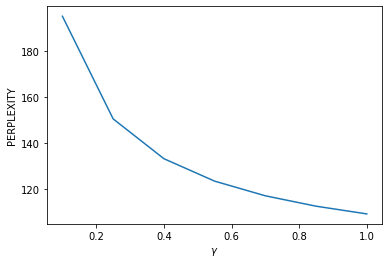

In [18]:

gamma_values = np.linspace(0.1,1,num=7)
perplexity_values = []
for gamma in gamma_values:
  lm = train_word_gen('../data/ptb.train.txt',gamma=gamma)
  perplexity_values += [perplexity(lm,'../data/ptb.valid.txt')]

plt.plot(gamma_values,perplexity_values)
#plt.loglog([val for word,val in collections.Counter(corpus).most_common(4000)])
plt.xlabel('$\gamma$')
plt.ylabel('PERPLEXITY')

109.09225296489092
1.4732221154037362
1.0219284781911773
1.0041402175981577
1.0015080066888122
1.0001703209355337
1
1
1


Text(0, 0.5, 'PERPLEXITY')

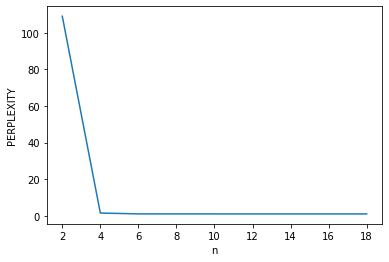

In [19]:
best_gamma = 1 #according to the plot above

n_values = list(range(2,20,2))
perplexity_values = []
for n in n_values:
  lm = train_word_gen('../data/ptb.train.txt',n=n,gamma=best_gamma)
  print (perplexity(lm,'../data/ptb.valid.txt',n=n))
  perplexity_values += [perplexity(lm,'../data/ptb.valid.txt',n=n)]

plt.plot(n_values,perplexity_values)
#plt.loglog([val for word,val in collections.Counter(corpus).most_common(4000)])
plt.xlabel('n')
plt.ylabel('PERPLEXITY')

In [269]:
best_n = 3
best_gamma =1

lmWords = train_word_gen('../data/ptb.train.txt',n=best_n,gamma=best_gamma)
print(perplexity(lmWords,'../data/ptb.test.txt',n=best_n))



6.442197656305259


1.3.2 Generating text

Another way to evaluate a language model is to use the model in a generative manner - that is, to randomly sample sentences starting from a seed prefix, and generating each next word by sampling from the model distribution p(w | prefix).

Discuss ways to generate when the seed is shorter than the history length of the n-gram model. Discuss ways to decide when the generation should stop. In this question, when you sample from the LM given a history, pick the most likely word generated by the LM. Report at least 5 randomly generated segments on different seeds and comment on what you observe.

1.3.2.1
A way to increase the history is to randomized sample from the grams in the distrubution and concat it to to the history.
One proposal to stop, we would stop if there exist a history that the model hasn't seen before.

In [0]:
def generate(model,seed):
  gram = seed
  i=20
  print(seed,end=' ')
  while i>0:
    next_word, prob = model.predict_next_word(gram)
    print(next_word,end=' ')
    gram = " ".join(gram.split()[1:] + [next_word])
    i=i-1

In [273]:
generate(lmWords,'environmental protection')

environmental protection agency stands to receive a $ 300-a-share buy-out bid that banks would n't be reached for comment the federal reserve 

##1.4

The Unreasonable Effectiveness of Recurrent Neural Networks

First, the most surprised fact is that RNNs described in the blog are Turing-Complete theoretically, which give them the power to approximate programs over approximating function as NNs do.
The most surprising experient result is that the ability of RNNs/LSTM to learn complex syntactic structures. According to the experiment of the Wikipedia sampling, after training and validating few models on the dataset, the RNN was able to capture the structural phase of an article in Wikipedia. For example, generating the opening  and closing parentheses of links and also generating headlines and lists according to Wikipedia articles. The results in Wikipedia suggest that the model is actually quite good at learning complex syntactic structures and also we can learn from Chomsky’s Hierarchy that the model at least has the power of CFG (by applying parentheses). Furthermore, the Latex model experiment shows quite astonishing results, the resulted papers are almost compiled by Latex compiler (with few manually changes). 



**The unreasonable effectiveness of Character-level Language Models (and why RNNs are still cool)**

In the last essay (by Andrej Karpathy) we saw that RNN (and specifically LSTM) are very good for various tasks.
In detail, we built character-level language model for generating texts.

In this essay, we deploy Unsmoothed Maximum Likelihood Character Level Language Model and see that its performence is not so different than the complex RNN.

First, we train the LM for n-gram (n is chosen empirically) usind a dictionary where each key is a tuple (the n-gram) and the values is a collections.Counter object for the character proceeding the gram. Withit we compute the distribution of the character given a sequence of characters.

Then, we generate text from the model by basically sample from the distributions we created. That is, we look in the history of the text and given it, by looking up the history in the dictionary, we sample.

We can observe that for big n (~10) the generated text "looks like" English and is not so different than the ones generated with RNN. While this model is simple and uses simple statistics, unlike the blackbox of RNN/LSTM.

So why RNN are still important?
We can observe that the generated texts using it "remember" better. That is, the texts mostly do not have parentheses without closure and when learn indendation with texts such as Linux's Kernel.

We can conculde that simple satistics can generate similar texts to RNN but the complex structure of RNN and the architecure of LSTM enable it to understand syntax.



In [22]:
#download the dataset
!wget http://www.ffts.com/recipes/lg/lg32965.zip
!unzip lg32965 -d recipes_dataset
!rm lg32965.zip
!ls

--2019-12-26 18:59:47--  http://www.ffts.com/recipes/lg/lg32965.zip
Resolving www.ffts.com (www.ffts.com)... 66.96.149.1
Connecting to www.ffts.com (www.ffts.com)|66.96.149.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11805248 (11M) [application/zip]
Saving to: ‘lg32965.zip.1’

lg32965.zip.1       100%[===================>]  11.26M  13.9MB/s    in 0.8s    

2019-12-26 18:59:48 (13.9 MB/s) - ‘lg32965.zip.1’ saved [11805248/11805248]

Archive:  lg32965.zip
replace recipes_dataset/11000.mmf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: recipes_dataset/11000.mmf  
replace recipes_dataset/13000.mmf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: recipes_dataset/13000.mmf  
replace recipes_dataset/15000.mmf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: recipes_dataset/15000.mmf  
replace recipes_dataset/17000.mmf? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: recipes_dataset/17000.mmf  
  inflating: recipes_dataset/19000.mmf  
  infl

In [23]:
#prepare dataset
with open('recipes_dataset/32965.mmf',errors='ignore') as file:
  recipes=[]
  collector = []
  for line in file:
    line = str(line).replace('MMMMM','')#.replace('\n','')
    if 'Recipe via Meal-Master (tm) v8.05' in line:
      recipes += [''.join(collector)]
      collector = []
    else:
      collector += [line]
  recipes += [''.join(collector)]
  recipes = recipes[1:]

#print statistics
total_recipes = ''.join(recipes)
print('number of recipes',len(recipes))
print('number of tokens',num_token(total_recipes))
print('number of characters',num_char(total_recipes))
print('vocabulary size',dist_words(total_recipes))
print('avg word count',float(np.mean([num_token(rec) for rec in recipes])))
print('avg word length')


number of recipes 965
number of tokens 201821
number of characters 783933
vocabulary size 10676
avg word count 209.1740932642487
avg word length


In [0]:
class MyDataLoader():

  def __init__(self,dataset):
    from math import floor,ceil

    self.train_data = dataset[0:floor(0.8*len(dataset))]
    self.valid_data = dataset[ceil(0.8*len(dataset)):floor(-0.1*len(dataset))]
    self.test_data = dataset[ceil(-0.1*len(dataset)):]

In [0]:
dataloader = MyDataLoader(recipes)
joined_recipes_train = ''.join(dataloader.train_data)
joined_recipes_test = ''.join(dataloader.test_data)
joined_recipes_val = ''.join(dataloader.valid_data)

# with open('tmp_train.txt', "w") as text_file:
#   text_file.write(joined_recipes_train)
# with open('tmp_test.txt', "w") as text_file:
#   text_file.write(joined_recipes_test)

#using Ben Eyal's implementation for chars lang. model


def create_lm(data, n=5):
    pad = '$' * (n-1)
    data = pad + data
    cfd = nltk.ConditionalFreqDist((data[i : i + n-1], data[i + n-1]) for i in range(len(data) - (n-1)))
    cpd = nltk.ConditionalProbDist(cfd, nltk.MLEProbDist)
    return cpd

def chars_generate(lm,n,num_chars):
  import string
  import random

  out = []
  hist = '$' * (n-1)
  for _ in range(num_chars):
      try:
        #print(hist)
        #print(lm[hist])
        letter = lm[hist].generate()
      except:
        break
      hist = hist[1:] + letter
      out.append(letter)
  print(''.join(out))

def chars_perplexity(lm,data,n):
  answer = 1
  for i in range(len(data) - (n+1)):
      prev_chars = data[i:i+n-1]
      next_char= data[i+n-1]
      eval = lm[prev_chars].prob(next_char)
      if eval==0:
        eval = 1/(128) #ascii (smoothing)
      if eval!=0:
        eval = (1/(eval)) **(1/len(data))
        answer*= eval
  return answer  




Text(0, 0.5, 'PERPLEXITY')

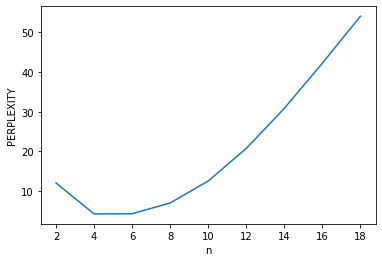

In [26]:
n_values = list(range(2,20,2))
perplexity_values = []
for n in n_values:
  lm = create_lm(joined_recipes_train,n=n)
  perplexity_values += [chars_perplexity(lm,joined_recipes_val,n=n)]

plt.plot(n_values,perplexity_values)
plt.xlabel('n')
plt.ylabel('PERPLEXITY')

In [27]:
best_n = 6 #according to the graph

lm = create_lm(joined_recipes_train, n=best_n)
num_chars = int(np.mean([num_char(rec) for rec in dataloader.test_data]))
chars_generate(lm,best_n,num_chars)

 
     2 tb Onion, may have used in warm. Drain off fat in heavy cream
 
  Place on wire rack, garlic in rice diced
     Garlic and rosemary. Arange juice. Add green
     1 c  While stirring or milk, sugar
  1 1/2 c  Saute' 1 minutes.
  
  Refrigerated)
       2 c  Celery seeded
            Title: JIM BOWL. BEAT butter cold seconds, or until mushrooms, basil,
  fry on the and remaining zucchini is melt 2 tables, Main dish. Servings
 
    10 oz Tomatoe pasta, Beef Cube cheese - parmesan cheese
 
            Breads, Quick Mix" tri-fold oven. Add tomatoes, dry shell
  foam sugar, egg,
  sugar. Preheat oil
  though the pear in a cooking. Slowly additions. Over to a boil and servings
 
     Yield: 2 Serve slices in Jiffy Butter
    WALT RISING THE SHRIMP
        1 c  Milk
 
  1) Press the bay leaf bastina-heat. Breads gave meat dough into a rack. With parsley, salt, sugar, chives and currants.  Cover zucchini has set, instantial.
        -mixture.
  Knead it make dough i


In [28]:
chars_generate(lm,best_n,num_chars)

 
     -minced
       Yield: 4 Servings
 
----------------------------------
      2 lb Ground beef drip
  and strain rind insert Shared by Elizabeth Baird: "A Blend well. Sprinkle
  with freshly ground turkey melted with grease the salads, Quick come of the ingredients and add the cheese
       4    Eggs
                Celery and hands into the manufacture and egg, finely Choices, hold
  more vinegar
    1    Make uncooked rimmed
    1/4 c  Milk
     2 tb Chickens. Spoon and cook one edging the meat from a floured by:
  Cover salad or sprinkle with bake 2 1/2 ts Dried, cut in
  per servings
 
----------------------JALEBIS------
     1 c  Spaghetti or maker
      2    green beans; drain.Makes a boiling,
  color
  absorbed.
  
  Hazelnut Markets. Strawberry jello
       1/4 ts Ginger if need throughly on top will keep a light. Next to sticks of smoke at all
  filing the other sauce;
      To 3 3/4 c  Bread soup with
          1/2 ts Cook 10 minutes.
  
  Place to sk


In [29]:
chars_generate(lm,best_n,num_chars)

 
       3/4 c  Whole to thing thumb and vinegar
    1/2 teaspoons of the dough.  Knead the pot, punch dough. Place the been sour cream. Cover meat **
     Yield: 4 Serve whites
  and tomato salt
  2 1/2 ts Instantly. Keep in gummy firm frequently to
  chicken stock)
     1    Rump roasted by Stephen Ceideburg 2
  cup
          Yield: 1 10" to 10 min or
    1    Grated Fat...Trace Provalone Cherry or to
       10 dr Green pepper and
  rack of tomato.
        Yield: 6 Servings--except 1/4 c  Milk
      6 c  Flour
           Yield: 5 Serve in shallow rice and top of
  make than 1-inch & arranges.
  
  Rinse ricotta cheese (sorry, Cognac or cheeses.
  
  Drain
  the jar for
            Title: ITALIAN HERB DRESSING TRAY. BAKE
 Categories: Breads, Ethnic
      - uncovered, 1/2 ts Pepper, try is exotic continue until you can use into bring up to 50 minutes, the refrigerate the dried the directions; cut each leaves simmer, stick buttermilk.  Mix well amount of the lemon ju


In [30]:
chars_generate(lm,best_n,num_chars)

 
          1 md Boil & heat to avoid burner Inn, Sandy Main dish with butter, but, after each adding them completely into 1-inch loaf. 10.  Definitely). Rub
  the recipe dough to a bowl mixture to cool combine remaining powder,
  fold overnight.
   What in refreezer 10 to 15 minutes, then covered Sugar
  1 1/2 tb Brown sugar
       Yield: 6 Serving effect.
  
  I tried oregano
      1/2 ts Nutmeg
  2 1/2 c  Sugar
    1/4 c  Whole Alaska Seafoo, Fish sauce, green peppercornstarch
     Title: JAMBALAYA I
 Categories: Appetizers, cut out onions and shaving pa= n, and crumbs,dressing to escarole
  bowl compiled potatoes--lettuce.
  
  Mix all ingredients
              Yield: 1 Serving-- canning so you add browns Johnsonian.
  
      (12 ounces sounds with to full recipe By        Yield: 16 Servings
 
      2 c  Mayonaise. Discard and diced dried basil
    Fresh crushed
     1/4 c  Red apricots,
  cabbage; cut in large heat eggplant
  dish at a time, beaten well. Season


###Observations
We can see that the LM's dist. can 'understand' the structure of recipes. That is, understand a syntax similar to [amount] [unit] [ingredient] [activity]* 

We also observe that some ingredient typically occure in the beginning, such as Oregano, we have no idea why it happens.

The model doesn't do indendation like the dataset. It doesn't finish some sentences.

Although the model is for characters, we can see that it's not completely gibberish, there are many real English words that appear semantically in the vocabullary of recipes, as we expected.


#Part 2

In [0]:
import matplotlib.pyplot as plt
import matplotlib
import math
import numpy as np
import scipy.linalg

In [0]:
def generateDataset(N, f, sigma):
  mu = 0.0
  vf = np.vectorize(f)
  x = np.linspace(0,1,num=N)
  noise = np.random.normal(loc=mu,scale=sigma,size=N)
  t = vf(x) + noise
  return (x,t)

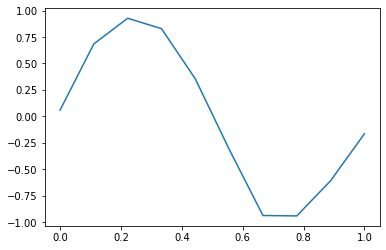

In [33]:
#sanity check
f = lambda x : math.sin(math.pi * 2 * x)
plt.plot(*generateDataset(10,f,0.1))

In [0]:
def OptimizeLS(x, t, M):                      
  phi = np.vander(x,M+1,True)
  prod = np.dot(phi.T, phi)             
  i = np.linalg.inv(prod)
  m = np.dot(i, phi.T)
  w = np.dot(m, t)
  return w                                                              

In [35]:
np.vander([1,2,3,4],3,True)

array([[ 1,  1,  1],
       [ 1,  2,  4],
       [ 1,  3,  9],
       [ 1,  4, 16]])

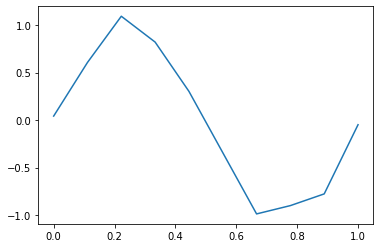

In [36]:
(x,t) = generateDataset(10,f,0.1)
plt.plot(x,t)

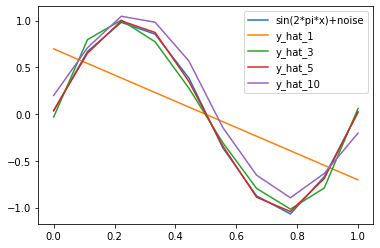

In [37]:
N = 10
get_y = lambda w,M: lambda x: sum([w[i]*(x**i) for i in range(M+1)])
(x,t) = generateDataset(N,f,0.03)
plt.plot(x,t)
for M in [1,3,5,10]:
  w = OptimizeLS(x,t,M)
  y_hat = np.vectorize(get_y(w,M))
  plt.plot(x,y_hat(x))
plt.legend(['sin(2*pi*x)+noise','y_hat_1','y_hat_3','y_hat_5','y_hat_10'])

##2.4

In [0]:
def generateDataset3(N,f,sigma):
  from math import ceil,floor
  mu = 0.0
  vf = np.vectorize(f)
  x = np.linspace(0,1,num=N*3)

  noise = np.random.normal(loc=mu,scale=sigma,size=N*3)
  t = vf(x) + noise
  pairs = list(zip(x,t))
  #print(list(zip(x,t)))
  np.random.shuffle(pairs)
  #print(pairs)
  def sort_by_x(lst):
    return sorted(lst,key=lambda x : x[0])
  train = sort_by_x(pairs[0:N])
  valid = sort_by_x(pairs[N:2*N])
  test = sort_by_x(pairs[2*N:])
  return train,valid,test

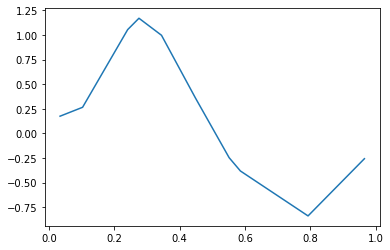

In [39]:
a,b,c = generateDataset3(10,f,0.1)
a_x = [x for x,_ in a]
a_y = [y for _,y in a]
plt.plot(a_x,a_y)

In [0]:
def optimizePLS(x, t, M, _lambda):
  phi = np.vander(x,M+1,True)
  prod = np.dot(phi.T, phi)
  lambda_mat = np.eye(M+1)*_lambda + prod
  i = np.linalg.inv(lambda_mat)
  m = np.dot(i, phi.T)
  w = np.dot(m, t)
  return w   

In [0]:
def optimizePLS2(xt, tt, xv, tv, M):
  N = len(xt)
  min_error  = [1,1,float("inf")]
  for log_lambda in range(-40,-20):
    w = optimizePLS(xt,tt,M,2**log_lambda)
    error = calculate_error(w,xv,tv)
    if error<min_error[2]:
      min_error = [2**log_lambda,w,error]
  print('chosen lambda',min_error[0])
  return min_error[0],w

In [0]:
def calculate_error(w,x,y):
  poly = np.vectorize(get_y(w,M))
  poly = poly(x)
  power2 = lambda x : x**2
  error = (1/N)*(sum(power2(y - poly)))**(1/2)
  return error

chosen lambda 4.656612873077393e-10
chosen lambda 1.1920928955078125e-07


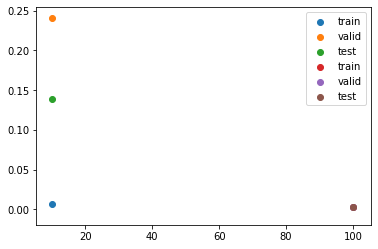

In [43]:
for N in [10,100]:
  (train,val,test) = generateDataset3(N,f,0.03)
  xt = [x for x,_ in train]
  tt = [x for _,x in train]
  xv = [x for x,_ in val]
  tv = [x for _,x in val]
  xtest = [x for x,_ in test]
  ttest = [x for _,x in test]
  M = N - 1
  _,w = optimizePLS2(xt,tt,xv,tv,M)
  plt.scatter(N,calculate_error(w,xt,tt))
  plt.scatter(N,calculate_error(w,xv,tv))
  plt.scatter(N,calculate_error(w,xtest,ttest))
plt.legend(['train','valid','test','train','valid','test'])

##2.4

In [0]:
import numpy as np


def bayesianEstimator(x,t,M,alpha,sigma2):
  def phi(x):
    return np.array([x**i for i in range(M+1)]).reshape((M+1),1)
  N = len(x)
  phi_sum = np.zeros((M+1,M+1))
  for n in range (N):
    phi_sum  += np.multiply(phi(x[n]),(phi(x[n]).T))
  S_inv = alpha*np.identity(M+1) + np.dot((1/sigma2),phi_sum)
  phi_mat = np.vander(x,M+1,True)
  S = np.linalg.inv(S_inv)
  def mean(xi):
    sumX = np.array([0]*(M+1))
    for n in range(N):
      a = np.dot(phi_mat[n], t[n])
      sumX = np.add(sumX,a)
    return (1/sigma2)*(phi(xi).T)@S@sumX
  
  def variance(x):
    return sigma2 + (phi(x).T)@S@phi(x)

  return (mean,variance)

Text(0.5, 1.0, 'Bayesian Estimation')

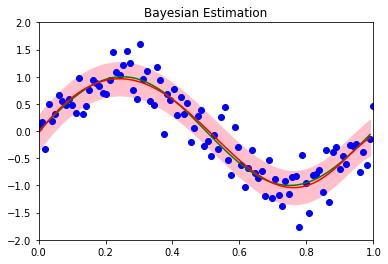

In [215]:

x, t = generateDataset(N=100,f=lambda x: math.sin(2*np.pi*x),sigma=math.sqrt(1/11.1))
m,v = bayesianEstimator(x,t,9,0.005,1/11.1)

# x_real = sorted(np.random.normal(0,1,100)
x_real = np.arange(0, 1, 0.01)
y_real = np.sin(2*np.pi*x_real)


m = np.vectorize(m)
v = np.vectorize(v)
mean = m(x_real)
#mean = [m(t) for t in x_real]
variance = v(x_real)
#variance = [v(t) for t in x_real]

SD = np.sqrt(variance)
upper = mean + SD
lower = mean - SD



plt.plot(x, t, 'bo')
plt.plot(x_real, y_real, 'g-')
plt.plot(x_real, mean, 'r-')
plt.fill_between(x_real, upper, lower, color='pink')
plt.xlim(0.0, 1.0)
plt.ylim(-2, 2)
plt.title('Bayesian Estimation')

A way to make this height very small in one segment of the function and large in another is to sample x_real from another distrubution (not uniform) and create dataset which varies from zero variance on the first x in x_real to high variance on the last.

**Part 3**

3.1

In [0]:
### PyTorch Tutorial Summary

Our dataset is designed by 9 text files, each for a language, where every line is a city name by that language.
The task is to classify cities's names to its language.

The method is to train a simple RNN character model, where every character is represented by a one-hot vector thus a name is a matrix.

The loss funciton is the negative log likelihood loss. It is useful to train a classification problem with C classes.

The evaluation method is a confusion matrix. The results are good, we can observe that generally the model can detect the label correctly.

3.2

In [274]:
!mkdir -p ../data/cities

!wget http://computational-linguistics-class.org/downloads/hw6/cities_val.zip
!wget http://computational-linguistics-class.org/downloads/hw6/cities_train.zip

!unzip cities_val.zip -d ../data/cities/
!unzip cities_train.zip -d ../data/cities/

!rm cities_train.zip
!rm cities_val.zip
!ls ../data   

--2019-12-26 22:57:53--  http://computational-linguistics-class.org/downloads/hw6/cities_val.zip
Resolving computational-linguistics-class.org (computational-linguistics-class.org)... 185.199.110.153
Connecting to computational-linguistics-class.org (computational-linguistics-class.org)|185.199.110.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7558 (7.4K) [application/zip]
Saving to: ‘cities_val.zip’

cities_val.zip      100%[===================>]   7.38K  --.-KB/s    in 0s      

2019-12-26 22:57:53 (732 MB/s) - ‘cities_val.zip’ saved [7558/7558]

--2019-12-26 22:57:56--  http://computational-linguistics-class.org/downloads/hw6/cities_train.zip
Resolving computational-linguistics-class.org (computational-linguistics-class.org)... 185.199.110.153
Connecting to computational-linguistics-class.org (computational-linguistics-class.org)|185.199.110.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159676 (156K) [application/zip]
Sav

In [0]:
import codecs
import math
import random
import string
import time
import numpy as np
import torch
from sklearn.metrics import accuracy_score

'''
Don't change these constants for the classification task.
You may use different copies for the sentence generation model.
'''
languages = ["af", "cn", "de", "fi", "fr", "in", "ir", "pk", "za"]
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

import unicodedata

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

# print(unicodeToAscii('Ślusàrski'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = codecs.open(filename, "r",encoding='utf-8', errors='ignore').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

In [276]:
#per category - #tokens, #characters, #distinct characters, #average of characters per token
print('~Number of categories is',len(languages),'~')
for lang in languages:
    lines = readLines('../data/cities/train/'+lang+'.txt')
    txt = ''.join(lines)
    print('**For language:',lang)
    print('Number of token is',num_token(' '.join(lines)))
    print('Number of chars for is',sum([len(l) for l in lines]))
    print('Number of distinct characters is',len(set(txt)))
    print('Average number of characters per token is',sum([len(w) for w in nltk.word_tokenize(' '.join(lines))])/num_token(txt))



~Number of categories is 9 ~
**For language: af
Number of token is 4905
Number of chars for is 32537
Number of distinct characters is 28
Average number of characters per token is 16.50242065626681
**For language: cn
Number of token is 3258
Number of chars for is 28946
Number of distinct characters is 27
Average number of characters per token is 110.76447876447877
**For language: de
Number of token is 5287
Number of chars for is 37377
Number of distinct characters is 29
Average number of characters per token is 15.300915830789359
**For language: fi
Number of token is 4185
Number of chars for is 31037
Number of distinct characters is 29
Average number of characters per token is 25.21368243243243
**For language: fr
Number of token is 3948
Number of chars for is 33448
Number of distinct characters is 29
Average number of characters per token is 34.4375
**For language: in
Number of token is 4333
Number of chars for is 33991
Number of distinct characters is 29
Average number of characters pe

unicodeToAscii is a good idea because different languages denote different unicode values for the same character in Ascii - by converting to Ascii we can analyze better.

3.3

In [0]:
import glob
import os
from io import open

def findFiles(path): 
    return glob.glob(path)
 
category_lines = {}
val_category_lines = {}

for filename in findFiles('../data/cities/train/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    if category not in all_categories:
        all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines
n_categories = len(all_categories)

for filename in findFiles('../data/cities/test/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    lines = readLines(filename)
    test_category_lines[category] = lines

In [0]:
def letterToIndex(letter):
    return all_letters.find(letter)

def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor


In [0]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [0]:
input = letterToTensor('A')
hidden =torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

In [281]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i
print(categoryFromOutput(output))

('za', 0)


In [282]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = cn / line = cesky sicndorf
category = pk / line = dori
category = in / line = pritugainy
category = in / line = winebrenners crossroad
category = cn / line = shashigang
category = cn / line = yutai
category = pk / line = mema
category = af / line = nurmukhammedkalay
category = fr / line = camsilvestre
category = ir / line = khairu khel sarga


In [0]:
criterion = nn.NLLLoss()

In [0]:
learning_rate = 0.002 

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return output, loss.item()

In [285]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000



# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 13s) 2.2358 le chalon / cn ✗ (fr)
10000 10% (0m 26s) 1.9488 ghawchak / af ✓
15000 15% (0m 40s) 0.8277 frederiksbjerg / de ✓
20000 20% (0m 52s) 1.2569 azzate / za ✓
25000 25% (1m 6s) 1.5293 ezzat od din / de ✗ (za)
30000 30% (1m 19s) 1.0048 requintadero / de ✓
35000 35% (1m 31s) 0.8583 zagrarao / za ✓
40000 40% (1m 44s) 3.0713 vaita / fi ✗ (fr)
45000 45% (1m 57s) 0.4633 belczace / za ✓
50000 50% (2m 10s) 0.5253 chupina / in ✓
55000 55% (2m 23s) 1.9664 le cauze / za ✗ (fr)
60000 60% (2m 35s) 0.1754 vokzalgorodnya / za ✓
65000 65% (2m 48s) 2.9987 khowrzug / za ✗ (ir)
70000 70% (3m 1s) 2.0677 nevsehir / in ✗ (ir)
75000 75% (3m 14s) 1.3263 ayn al fijah / ir ✗ (fi)
80000 80% (3m 27s) 2.6728 khanikhatun / cn ✗ (ir)
85000 85% (3m 40s) 1.3290 mahlerts / fr ✗ (de)
90000 90% (3m 52s) 1.5384 yangfan / cn ✓
95000 95% (4m 6s) 0.0959 cirfinli / fi ✓
100000 100% (4m 19s) 1.1318 casmaiqalaimohammad / af ✓


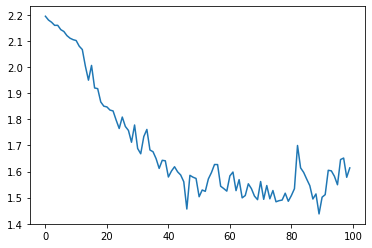

In [286]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

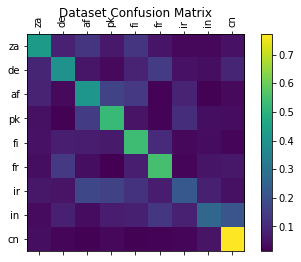

In [287]:
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.title('Dataset Confusion Matrix')
plt.show()

**Observation of the confusion matrix**

We can observe that the network does not detect 'ir' and 'in' well.
While for 'cn' the confusion is minimal.
We can conjucture that 'ir' and 'in' city names has features that are not so different than the ones in other languages.
And that 'cn' is much different.

*By features we mean the joint distribution of the characters, this is what the RNN tries to detect.*
